In [ ]:
import os
import sys
sys.path.append(os.path.dirname((os.path.abspath(''))))
from src.data.preprocessing import load_data, preprocess, train_tfidf, split_data, upsampling, get_features, setup


In [ ]:
# requires datasets library (use pip)
df = load_data()
df.head()

In [ ]:
# Create preprossesed data
df['preprocessed'] = preprocess(df['tweet'])
df.head()

In [ ]:
# Get n_usermentions and get seperate hashtags
df = get_features(df)
df.head()

In [ ]:
# Create trained tfidf vectorizer
tfidf = train_tfidf(df['preprocessed'])

In [ ]:
# Split data on specified column
df_train , df_test = split_data(df, 'preprocessed')

In [ ]:
# Upsample data
df_train_up = upsampling(df_train)
df_train_up.head()

In [ ]:
# Does all of the above (wip)
tfidf, df_train, df_test = setup()

In [ ]:
df_test.train()

In [ ]:
print('There is {} training data, of which {}% is hate speech '.format(df_train['label'].count(), round(df_train['label'].sum()/df_train['label'].count()*100,2)))
print('There is {} test data, of which {}% is hate speech '.format(df_test['label'].count(), round(df_test['label'].sum()/df_test['label'].count()*100,2)))

# Naive Bayes

In [1]:
import os
import sys
import pandas as pd
sys.path.append(os.path.dirname((os.path.abspath(''))))
from src.models.Naive_Bayes import train_mvb_bayes, train_mn_bayes, test_model, get_impact_words
from src.data.preprocessing import load_data, preprocess, train_tfidf, split_data, upsampling, get_features, setup


c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Jonas\OneDrive - bwedu\Studium_Master\1_FSS_2022\Data Mining [IE 500]\Projekt\Code\Git\Data_mining\src\data\preprocessing.py:19: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nl

In [2]:
results_mvb = pd.DataFrame(['precision', 'recall', 'accuracy', 'F1', 'alpha'])
results_mn = pd.DataFrame(['precision', 'recall', 'accuracy', 'F1', 'alpha'])

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<?, ?it/s]


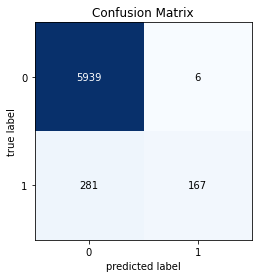

no_hate: my in and for you a i the to user
hate: in libtard to is of are you a the user


c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [3]:
# Don't Remove Stopwords, No Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=False, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Only Tokenization'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Only Tokenization'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


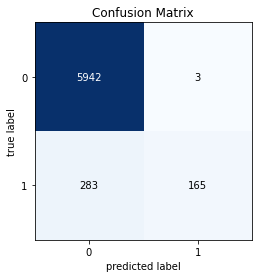

no_hate: life im time u positive happy thankful day love user
hate: liberal racist politics white black â¦ amp trump libtard user


c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [4]:
# Remove Stopwords, No Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Remove Stopwords'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Remove Stopwords'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


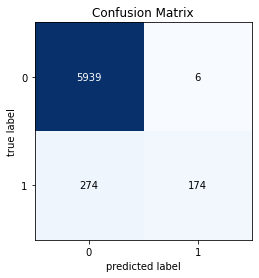

no_hate: eyes heart happy positive thankful day love smiling face user
hate: liberal racist politics white black … amp trump libtard user


c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [5]:
# Remove Stopwords, Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=True)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Emojis'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Emojis'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 183.00it/s]


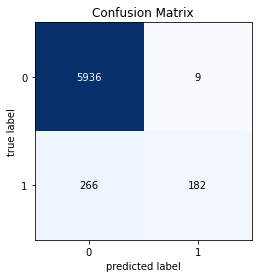

no_hate: eye heart posit happi thank love day smile face user
hate: polit liber racist white … black amp trump libtard user


c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Remove Stopwords, Emojis, Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=True, do_lem=False, split=True, upsample=False, do_emojis=True)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Stemming'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Stemming'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 154.90it/s]


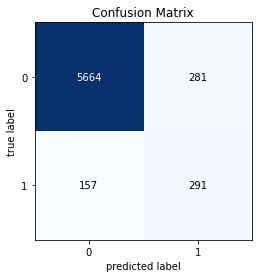

no_hate: eye heart posit happi thank love day smile face user
hate: polit racist liber white … black amp trump libtard user


c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Remove Stopwords, Emojis, Stemming, Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=True, do_lem=False, split=True, upsample=True, do_emojis=True)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Upsampling'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Upsampling'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 121.93it/s]


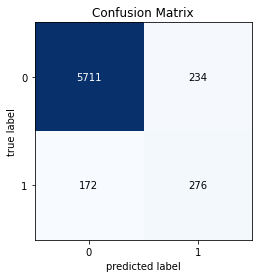

no_hate: eyes heart happy positive thankful day love smiling face user
hate: liberal racist politics white black … amp trump libtard user


c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [8]:
# Remove Stopwords, Emojis, No Stemming, Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=True, do_emojis=True) 
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['All_but_stemming'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['All_but_stemming'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

In [ ]:
# Remove Stopwords, Emojis, No Stemming, Upsampling, No user string
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=True, do_emojis=True, no_user=True) 
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['no_user'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['no_user'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 125.06it/s]
c:\Users\Jonas\OneDrive - bwedu\Studium_Master\1_FSS_2022\Data Mining [IE 500]\Projekt\Code\Git\Data_mining\src\data\preprocessing.py:118: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(nltk.word_tokenize(text.lower()))


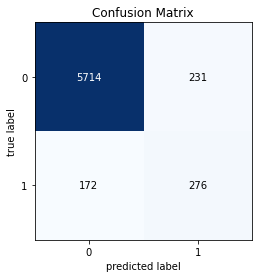

no_hate: im u amp happy eyes heart day love smiling face
hate: people politics racist white black like libtard … trump amp


c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [10]:
# Remove Stopwords, Emojis, No Stemming, Upsampling, No user string, Countvectorizer
count, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=True, do_emojis=True, no_user=True, vectorizer='count') 
mvb = train_mvb_bayes(df_train, count)
mn = train_mn_bayes(df_train, count)
results_mvb['count_vec'] = test_model(mvb, df_test, count, get_params=True)
results_mn['count_vec'] = test_model(mn, df_test, count, plt_confusion = True, get_params=True)
get_impact_words(df_train, count)

In [11]:
#results_mn.to_csv("C:/Users/jonas/OneDrive - bwedu/Studium_Master/1_FSS_2022/Data Mining [IE 500]/Projekt/results_mn.csv", sep=';', decimal=',')
results_mn

,0,Only Tokenization,Remove Stopwords,Emojis,Stemming,Upsampling,All_but_stemming,no_user,count_vec
0,precision,0.965714,0.988024,0.972067,0.961326,0.511737,0.545455,0.559292,0.546689
1,recall,0.377232,0.368304,0.388393,0.388393,0.729911,0.709821,0.705357,0.71875
2,accuracy,0.95542,0.95542,0.956359,0.956046,0.93227,0.938214,0.940404,0.938527
3,F1,0.542536,0.536585,0.555024,0.553259,0.601656,0.616877,0.623889,0.621022
4,alpha,{'alpha': 0.16768329368110074},{'alpha': 0.2442053094548651},{'alpha': 0.2442053094548651},{'alpha': 0.20235896477251566},{'alpha': 0.01},{'alpha': 0.01},{'alpha': 0.01},{'alpha': 0.01}


In [12]:
#results_mvb.to_csv("C:/Users/jonas/OneDrive - bwedu/Studium_Master/1_FSS_2022/Data Mining [IE 500]/Projekt/results_mvb.csv", sep=';', decimal=',')
results_mvb

,0,Only Tokenization,Remove Stopwords,Emojis,Stemming,Upsampling,All_but_stemming,no_user,count_vec
0,precision,0.916667,0.934524,0.926702,0.934911,0.507576,0.536379,0.537288,0.537288
1,recall,0.368304,0.350446,0.395089,0.352679,0.747768,0.707589,0.707589,0.707589
2,accuracy,0.953387,0.952761,0.95542,0.952917,0.931488,0.936649,0.936806,0.936806
3,F1,0.525478,0.50974,0.553991,0.512156,0.604693,0.610202,0.61079,0.61079
4,alpha,{'alpha': 0.517947467923121},{'alpha': 0.517947467923121},{'alpha': 0.517947467923121},{'alpha': 0.6250551925273969},{'alpha': 0.01},{'alpha': 0.01},{'alpha': 0.01},{'alpha': 0.01}
